# Making a simple Neural Network  (80%)

- In this assignment, we attempt to use [**mnist dataset**](http://yann.lecun.com/exdb/mnist/) to train our neural network, which concluded by Handwritten digital images from 0 to 9

- The training and testing method - use **labelled images** (e.g., the image contains a cat) to train a **neural network**
  - [Training] Adjust the **neural network weights** by comparing the **estimated (output) labels** and the **ground truth** labels
  - [Testing] Given another set of labelled images (testing dataset), we evaluate the **accuracy** of the trained neural network.

# (1) Data Preparation

In [130]:
# preparing data
# train_img and test_img are grey images size 28*28
# train_label and test_label are classification of images,e.g.0-9
import sys, os 
import numpy as np
sys.path.append(os.pardir) 
from dataset_local.mnist import load_mnist

def get_data():
    (train_img_all, train_label_all), (test_img_all, test_label_all) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    train_img=train_img_all[0:800]
    train_label=train_label_all[0:800]
    test_img=test_img_all[0:200]
    test_label=test_label_all[0:200]
    return train_img, train_label,test_img,test_label

def display(img, width=28, threshold=0):
    render = ''
    for i in range(len(img)):
        if i % width == 0:
            render += '\n'
        if img[i] > threshold:
            render += '@'
        else:
            render += '.'
    return render

# getting the data
train_img, train_label,test_img,test_label = get_data() 
print(train_img.shape, train_label.shape, test_img.shape, test_label.shape)
sample_index=np.random.randint(0,train_img.shape[0],3)
for i in sample_index:
    print(display(train_img[i]), train_label[i])

(800, 784) (800,) (200, 784) (200,)

............................
............................
............................
............................
...................@@@......
............@@@@@@@@@@......
............@@@@@@@@@@@.....
..........@@@@@@@@@@@@@.....
..........@@@@@.@@@..@@.....
..........@@@..@@@@.........
..........@@@@@@@@..........
..........@@@@@@@...........
...........@@@@@@...........
............@@@@@...........
...........@@@@@@...........
..........@@@@@@@@..........
..........@@@@@@@@@.........
.........@@@@..@@@@.........
.........@@@@..@@@@.........
........@@@@...@@@..........
........@@@@..@@@@..........
........@@@@@@@@@...........
.......@@@@@@@@@@...........
.......@@@@@@@@@............
............................
............................
............................
............................ 8

............................
............................
............................
............................
............@@@@............
...

# (2) Neural Network Introduction

First, we illustrate a Neural network structured as follows (which has only one hidden layer)
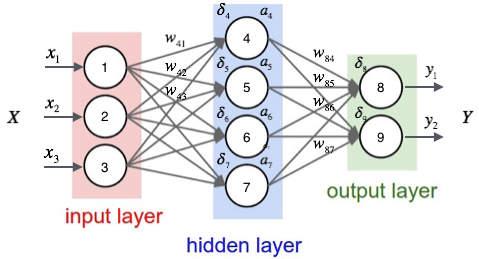

where $\vec{x}=[x_1, x_2, x_3, ...]$ indicates the features of an image $x$ and $\vec{X}$ is the set of image and their features.

# (2.1) Feed Forward Network

## Hidden layer
The hidden layer vector $A$ can be calculated by a linear equation as follows (Forward basic formula)
\begin{equation}
\vec{A}= f(W_{hidden}\cdot\vec{X})
\label{eq:forward1}\tag{forward 1}
\end{equation}
where $f(\cdot)$ is the **activation function** (see below). $W_{hidden}$ is the neurel network model (e.g., a matrix that indicates the edge weights between $\vec{X}$ and $\vec{A}$ in the figure, such as $w_{41}$, $w_{42}$, ... )

**Let us understand this equation using the figure above**<br>
For each $\vec{x}$ in $\vec{X}$:<br>
> $\vec{x}=[x_1, x_2, x_3]$<br>
$\vec{A}=[a_4, a_5, a_6, a_7]$<br>
$a_4= x_1*w_{41} + x_2*w_{42} + x_3*w_{43}$<br>
$a_5= x_1*w_{51} + x_2*w_{52} + x_3*w_{53}$<br>
...<br>
**These steps are equivalent to matrix multiplication**
$W_{hidden}\cdot\vec{X}$


## Ouput layer
Similarly, the output layer vector $Y$ can be calculated as
\begin{equation}
\vec{Y}=f(W_{output}\cdot\vec{A})
\label{eq:forward2}\tag{forward 2}
\end{equation}

## Activation function
According to [geeksforgeeks](https://www.geeksforgeeks.org/activation-functions-neural-networks/), activation function decides, whether a neuron should be activated or not by calculating weighted sum and further adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of a neuron.

In other words, this is a function to transform the original value (from linear equation) to another value (e.g., non-linearity)

In this assignment, we simply adopt **ReLU activation function**

\begin{equation}
f(x)=\left\{\begin{aligned}x &  & x>=0 \\0  &  & x<0 \end{aligned}\right.
\label{eq:activation} \tag{activation}
\end{equation}
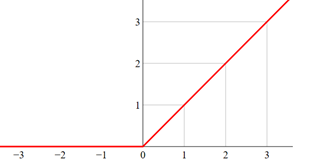



# (2.2) Deimensionality of the vectors and matrices

- The input layer size is set to $m*784$ (the input data is $m$ images of 784 dimensions, 28x28 black-and-white pixels)
$$\vec{X}.shape=(m,784)$$

- The hidden layer size is set to $784*h$ ($h$ is set to 50 based on TA's preferences)
$$W_{hidden}.shape=(784,h) \qquad  \vec{A}.shape=(m,h)$$

- The output layer size is set to $m*10$ (the output data should contain the probabilities of digits 0 .. 9, please refer to the meaning of MNIST dataset)

$$W_{output}.shape=(h,10)\qquad\vec{Y}.shape=(m,10)$$

# (2.3) How to decide the weight matrix values - Backpropagtion

In a neural network, we would update the **weights** of the neurons on the basis of **the error at the output**. This process is known as back-propagation.

## Loss function - measuring the error
<center>$$E_\vec{\omega}=\frac{1}{2}\sum_{d\in{D}}(t_d-y_d)^2$$</center>
where D is the set of training examples, $t_d$ is the target output for training example d, and $y_d$ is the output of the linear unit for training example d.

each $\omega_{i}$ is a real-valued constant, or weight, that determines the contribution ofinput $x_{i}$ to the perceptron output,the weight $\omega_{i}$ associated with input $\vec{\omega}=[\omega_{0},\omega_{1},\omega_{2},......\omega_{n}]$

## Gradient descent - updating the weight of matrices
<center>$$\vec{\omega}\xleftarrow{}\vec{\omega}-\eta\cdot{\frac{\partial{E}}{\partial{\vec{\omega}}}}{}$$</center>
where $\eta$ is the learning rate of each output and $\frac{\partial{E}}{\partial{\vec{\omega}}}$ attempts to find the local optimal value.

The math derivations are skipped in this simple example. The summarized of the update functions in two layers are listed as follows. For future reading, please go to the [Backpropagation wiki page](https://en.wikipedia.org/wiki/Backpropagation).

<center>$$\frac{\partial{E}}{\partial{\vec{\omega}}}=[\frac{\partial{E}}{\partial{\omega_{0}}},\frac{\partial{E}}{\partial{\omega_{1}}},\frac{\partial{E}}{\partial{\omega_{2}}},......,\frac{\partial{E}}{\partial{\omega_{n}}}]$$</center>
    
Notice $\frac{\partial{E}}{\partial{\vec{\omega}}}$is itself a vector, whose components are the partial derivatives of E with respect to each of the $\omega_{i}$. 

<center>$$\frac{\partial{E}}{\partial{\omega_{i}}}=\frac{\partial{(\frac{1}{2}\sum_{d\in{D}}(t_d-y_d)^2)}}{\partial{\omega_{i}}}\\~~~=\frac{1}{2}\sum_{d\in{D}}\frac{\partial{((t_d-y_d)^2)}}{\partial{\omega_{i}}}\\~~~~~~~~~~~~~~~=\frac{1}{2}\sum_{d\in{D}}2(t_d-y_d)\frac{\partial{(t_d-y_d)}}{\partial{\omega_{i}}}\\ ~~~~~~~~~~~~~~=\sum_{d\in{D}}(t_d-y_d)\frac{\partial{(t_d-\vec{\omega}·\vec{x_d})}}{\partial{\omega_{i}}}$$</center>
<center>$$\frac{\partial{E}}{\partial{\omega_{i}}}=\sum_{d\in{D}}(t_d-y_d)(-x_id)$$</center>

where $x_{id}$ denotes the single input component $x_{i}$ for training example d. 

### For output layer
\begin{equation*}
W_{output}\xleftarrow{}W_{output}+\eta(\vec{t}-\vec{y})\vec{a}
\label{eq:update_1} \tag{update 1}
\end{equation*}

### For hidden layer
\begin{equation}
W_{hidden}\xleftarrow{}W_{hidden}+\eta(\vec{t}-\vec{y})W_{output}^T\vec{x}
\label{eq:update_2} \tag{update 2}
\end{equation}

**You need to implement the following functions in order to completet the assignment**

In [136]:
## Initialize parameters  
eta=0.11 # learning rate
input_size=784
h=50 # hidden size
o=10 # number of digits (prediction values)

def setupLables(labels):
    L = np.zeros([labels.size,o])
    for i in range(labels.size): L[i,labels[i]] = 1
    return L

# setting the variables
X = train_img
Y = setupLables(train_label)
X_T=test_img
Y_T=setupLables(test_label)

# refer to (2.2)
W1=np.random.random((input_size,h ))
W2=np.random.random((h,o))

# implement forward codes here
# refer (2.1)
def forward(X,W1,W2):
    # calculate Equation (forward 1)
    A=Relu(X.dot(W1))
    # calculate Equation (forward 2)
    Y_trained=Relu(A.dot(W2))
    return A,Y_trained
    #Y=Relu(W,X)

# implement backpropagation codes here
# refer (2.3)
def backpropagation(W1,W2,A,E): 
    # calculate Equation (update 1)
    W2_updated = W2 + eta * E.dot(A.transpose())
    np.nan_to_num(W2_updated,False)
    # calculate Equation (update 2)
    W1_updated = W1 + eta * ((X.transpose()).dot(E)).dot(W2_updated.transpose())
    np.nan_to_num(W1_updated,False)
    return W1_updated,W2_updated  

# implement activation function
# refer (2.1)
def Relu(wx):
    # implement Equation (activation)
    relu_wx = wx
    relu_wx[relu_wx<0]=0
    return relu_wx

# (4) Accuracy
- The images labels is **one-hot** representation, where **one-hot** is a 1xN matrix (vector) that sets the correct label to 1 and set the others to ZEROES.
    - For example, if the image is 3, so it image label is \\([0,0,0,1,0,0,0,0,0,0,0]\\)
- The neural network will output an array of the probabilities of digits (0 to 9). We can simply pick the label of the maximum probability as the returned label.
    - The way to find the maximum index in NumPy is **np.argmax(x)**

In [138]:
# As an example
import numpy as np
t_label=[0,0,1,0,0,0,0,0,0,0]
y_label=[0.1,0.0,0.2,0.04,0.03,0.0,0.11,0.21,0.16,0.15]
print(np.argmax(t_label),',',np.argmax(y_label))

2 , 7


**Implement the following function** in order to return the accuracy of your trained model 

In [137]:
def accuracy(W1_updated,W2_updated,Y,T): #Use test data to evaluate your accuracy
    count_correct=0
    count=T.shape[0]

    # For all testing images, you need to count the number of correctly identified labels as "count_correct"
    # and calculate the accuracy
    # [Your code here]
    for r in range(count):
        if (np.argmax(Y[r]) == np.argmax(T[r])):
            count_correct = count_correct+1

    accuracy=count_correct/count

    return accuracy

# (5) Training

In [121]:
# main logic of the training process
# iteratively train the model (up to #epoches)

epoches=6

(W1_updated,W2_updated)=(W1,W2)
for epoch in range(0,epoches):
    (A,Y_trained) = forward(X,W1_updated,W2_updated) #input training data and updated weights in last iteration
    E=(Y-Y_trained).transpose()
    (W1_updated,W2_updated) = backpropagation(W1_updated,W2_updated,A,E) # update weights
#    print(epoch, np.argwhere(np.isinf(W2_updated)), W2_updated.dtype)
#    print(epoch, np.argwhere(np.isinf(W1_updated)), W1_updated.dtype)
#    if (epoch == 4): print(W1_updated)
# check the accuracy
# print(X.dot(W1))
# np.set_printoptions(threshold=sys.maxsize)
# print(np.argwhere(np.isnan(X_T)))
# print(np.argwhere(np.isinf(W1_updated)))
# print(X_T.dot(W1_updated))
# (A,Y_trained) = forward(X_T,W1_updated,W2_updated)
# print((Y_trained>0).any())
accuracy(W1_updated,W2_updated,Y,Y_trained)
# accuracy(W1_updated,W2_updated,Y_T,Y_trained)

0.09875

# Written Question (20%)
1. Please explain the meaning of the following codes in Data Preparation<br>
**sys.path.append(os.pardir)**<br>
**from dataset_local.mnist import load_mnist**

2. Please explain why we need the "training dataset" and "testing dataset".

3. Is it true that we get better accuracy if we increase "epoches"? Why or why not?

<b>Answers:</b>
1. Your path (i.e. the list of directories Python goes through to search for modules and files) is stored in the <b>path</b> attribute of the <b>sys</b> module. Since <b>path</b> is a list, you can use the <i>append</i> method to add new directories to the path. One the other hand, <b>pardir</b> is an attribute of the <b>os</b> module to give the parent directory path of current system. Therefore, <b>sys.path.append(os.pardir)</b> is to add parent directory to the search path for current python runtime. <b>from dataset_local.mnist import load_mnist</b> means import the <i>load_mnist</i> function from the python file <i>dataset_local\mnist.py</i> related to the current search paths.
2. The <b>training dataset</b> is used to train up the model while the <b>testing dataset</b> is used to validate the accuracy of the trained model.
3. 


# Bonus Question (+20%)
- Feel free to try some extra steps that may improve the accuracy.
    - For instance:more epoches, change activation function or learning rate, etc.
- The maximum training time is **20 minutes**.
    - For your reference, the TA computation trains the default model for 5 epoches in 6min 42s. 
    - We will terminate the training if it overruns
- The mark will be given based on the **relative accuracy**.

Please write down how you improve the accuracy in this **text box**.

**Your Ans:**